In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('n26_v1.csv',index_col=0)

In [30]:
#drop userid column

df.drop(['userid'] , axis=1 , inplace = True)

In [31]:
# Create a new column named "total" which will be the sum of the different channels

df['total'] = df['cpc'] + df['organic'] + df['affiliate'] + df['social']
df.head()

,cpc,organic,affiliate,social,signup_date,campaign,total
0,1,0,0,1,2017-02-01,0,2
1,1,0,1,0,2017-01-10,0,2
2,0,0,1,1,2017-03-24,0,2
3,1,0,0,0,2017-03-06,0,1
4,1,0,0,0,2017-03-03,0,1


In [32]:
df.head()

,cpc,organic,affiliate,social,signup_date,campaign,total
0,1,0,0,1,2017-02-01,0,2
1,1,0,1,0,2017-01-10,0,2
2,0,0,1,1,2017-03-24,0,2
3,1,0,0,0,2017-03-06,0,1
4,1,0,0,0,2017-03-03,0,1


In [33]:
# Count of the different channels

chan_att = df['total'].value_counts().to_frame()

Asumption that the weight for each channel attribution has the same value of 10 

In [34]:
chan_att

,total
2,3347
1,1297
3,356


In [35]:
chan_att=chan_att.reset_index()

In [36]:
chan_att['attribution']= chan_att['total']*chan_att['index']

In [37]:
chan_att['cost'] = chan_att['attribution']*10

In [38]:
chan_att = chan_att[['index','total','attribution','cost']]

In [39]:
chan_att.columns = ['channels','user','attribution','cost']

In [40]:
user_acq_cost = chan_att['cost'].sum()/5000

In [41]:
user_acq_cost

18.118

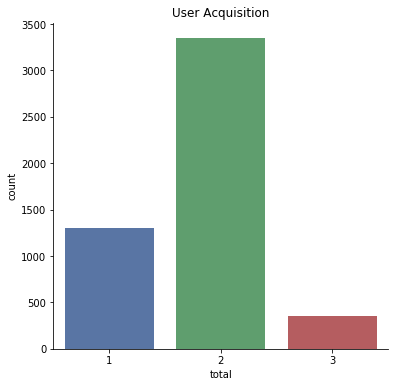

In [42]:
# countplot  of the different number of channels required to acquire a user. 

plt.figure(figsize=(6,6))
plt.title('User Acquisition')
sns.countplot(x=df['total'],data=df,palette='deep')
sns.despine()

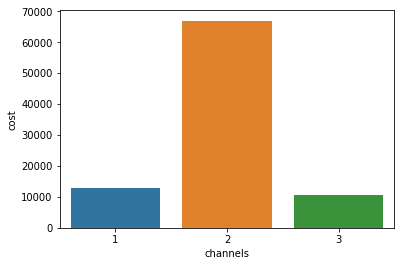

In [43]:
# countplot  of the different number of channels required to acquire a user. 

sns.barplot(x='channels',y='cost',data=chan_att)

In [64]:
mat =chan_att

In [45]:
corr_df=df

In [46]:
corr_df.drop(['signup_date', 'campaign'] , axis=1 , inplace = True)

In [50]:
corr_df1 = corr_df[corr_df['total']==1]
corr_df2 = corr_df[corr_df['total']==2]
corr_df3 = corr_df[corr_df['total']==3]

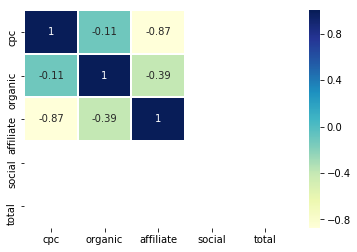

In [51]:
# Heatmap to visualize the correlation including all data

sns.heatmap(corr_df1.corr() ,cmap='YlGnBu',linecolor='white',linewidths=1 ,annot=True)

In [56]:
corr_df1.count()

cpc          1297
organic      1297
affiliate    1297
social       1297
total        1297
dtype: int64

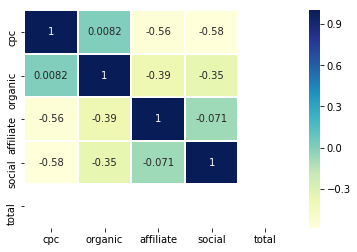

In [52]:
sns.heatmap(corr_df2.corr() ,cmap='YlGnBu',linecolor='white',linewidths=1 ,annot=True)

In [57]:
corr_df2.count()

cpc          3347
organic      3347
affiliate    3347
social       3347
total        3347
dtype: int64

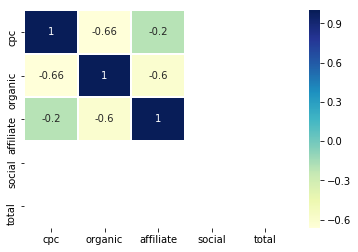

In [53]:
sns.heatmap(corr_df3.corr() ,cmap='YlGnBu',linecolor='white',linewidths=1 ,annot=True)

In [59]:
corr_df3.count()

cpc          356
organic      356
affiliate    356
social       356
total        356
dtype: int64

In [63]:
corr_df3['social'].value_counts()

1    356
Name: social, dtype: int64

In [66]:
mat.columns = ['multi touch','users acquired','attribution','cost']

In [67]:
mat.head()

,multi touch,users acquired,attribution,cost
0,2,3347,6694,66940
1,1,1297,1297,12970
2,3,356,1068,10680
